In [1]:
import os
import pickle
import pandas as pd
import numpy as np
import sys
import glob
import pickle
import os
import csv


#### CTD locations 

In [39]:

# Specify the folder path where the pickle files are located
folder_path = 'D:/temp_nemo/RUN203_EXTRACT/CTD/'

# Construct the pattern to search for .pickle files recursively
pattern = os.path.join(folder_path, '**', '*.pickle')

# Get a list of all pickle files in the folder and its subfolders
pickle_files = glob.glob(pattern, recursive=True)

lons=[]
lats=[]

# Loop through each pickle file
i = 1
for file_path in pickle_files:
    # Open the pickle file and load the dictionary
    with open(file_path, 'rb') as file:
        data = pickle.load(file)
        
        lat = data['lat']
        lon = data['lon']
        
        lats.append(lat)
        lons.append(lon)
    i += 1
    if i % 4000 == 0:
        print(i)
        
#     if i == 2000:
#         break

        
# Create a CSV file to store latitudes and longitudes
csv_file = 'CTD_lats_lons_only.csv'

# Write the latitudes and longitudes to the CSV file
with open(os.path.join(path1,csv_file), 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Latitude', 'Longitude'])
    writer.writerows(zip(lats, lons))

print(f"Latitude and longitude data saved to: {csv_file}")

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
Latitude and longitude data saved to: CTD_lats_lons_only.csv


In [71]:
data


{'z': masked_array(data=[0.5001885890960693, 1.5005680322647095,
                    2.500952959060669, 3.5013484954833984,
                    4.501765251159668, 5.502222061157227,
                    6.502758502960205, 7.503448009490967,
                    8.504437446594238, 9.506011009216309,
                    10.508721351623535, 11.513646125793457,
                    12.522880554199219, 13.540509223937988,
                    14.574468612670898, 15.640175819396973,
                    16.767484664916992, 18.013916015625,
                    19.489120483398438, 21.398033142089844,
                    24.109331130981445, 28.24054718017578,
                    34.69881820678711, 44.534488677978516,
                    58.5063591003418, 76.61442565917969, 98.09988403320312,
                    121.91240692138672, 147.1448516845703,
                    166.24343872070312],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, F

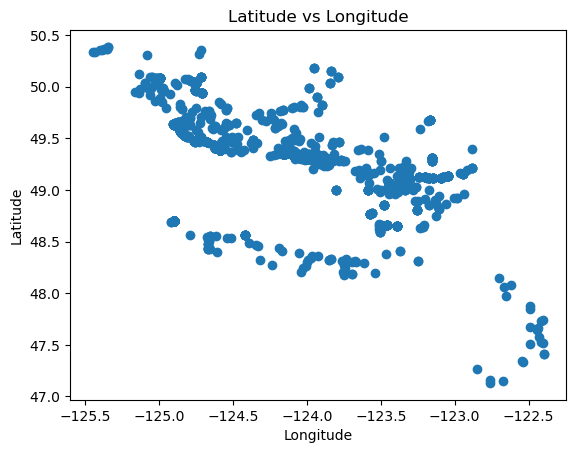

In [36]:
# import matplotlib.pyplot as plt
# # Create a scatter plot of latitudes and longitudes
# plt.scatter(lons, lats)
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.title('Latitude vs Longitude')

# # Display the plot
# plt.show()

### TG locations 

In [ ]:
# Specify the folder path where the pickle files are located


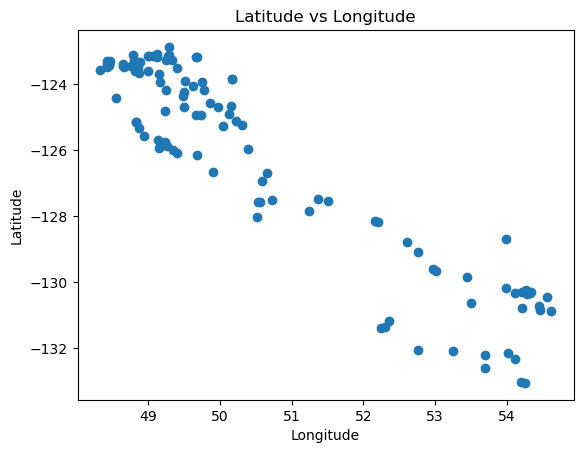

Latitude and longitude data saved to: TG_latslons_only.csv


In [70]:
import glob
import netCDF4 as nc
import os
import matplotlib.pyplot as plt


folder_path = 'D:/temp_nemo/TG_data/'
pattern = os.path.join(folder_path, '**', '*.nc')
nc_files = glob.glob(pattern, recursive=True)

file_names = []
lats = []
lons = []

for file_path in nc_files:
    dataset = nc.Dataset(file_path)
    
    file_name = os.path.splitext(os.path.basename(file_path))[0]
    file_names.append(file_name)

    lat_variable = dataset.variables['latitude']
    lon_variable = dataset.variables['longitude']
    lat_values = lat_variable[:]
    lon_values = lon_variable[:]
    
    lats.extend(lat_values)
    lons.extend(lon_values)

    # Do something with the lat and lon values if needed
    #print(f"File: {file_path}, Latitude: {lat_values}, Longitude: {lon_values}")

    # Close the NetCDF file
    dataset.close()

# Create a scatter plot of latitudes and longitudes
plt.scatter(lats, lons)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Latitude vs Longitude')

# Display the plot
plt.show()

# Create a CSV file to store latitudes and longitudes
csv_file = 'TG_latslons_only.csv'

# Write the latitudes and longitudes to the CSV file
with open(os.path.join(folder_path,csv_file), 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['TG','Latitude', 'Longitude'])
    writer.writerows(zip(file_names, lats, lons))

print(f"Latitude and longitude data saved to: {csv_file}")


### MCTD locations

In [55]:
# Specify the folder path where the pickle files are located
folder_path = 'D:/temp_nemo/RUN203_PLOTS_SCORES/'
file_mctd = 'mCTD_class4_RUN203_hindcast.pickle'

with open(os.path.join(folder_path, file_mctd), 'rb') as file:
    data_mctd = pickle.load(file)
    print(data_mctd.keys())

# Construct the pattern to search for .pickle files recursively
# pattern = os.path.join(folder_path, '**', '*.pickle')

# # Get a list of all pickle files in the folder and its subfolders
# pickle_files = glob.glob(pattern, recursive=True)

# lons=[]
# lats=[]

# # Loop through each pickle file
# i = 1
# for file_path in pickle_files:
#     # Open the pickle file and load the dictionary
#     with open(file_path, 'rb') as file:
#         data = pickle.load(file)

dict_keys(['SalishSea1500-RUN203', 'obs'])


In [69]:
stns = []
lats = []
lons = []

for stn in data_mctd['SalishSea1500-RUN203'].keys():
    for nid in data_mctd['SalishSea1500-RUN203'][stn].keys():
        
        lat = data_mctd['SalishSea1500-RUN203'][stn][nid]['lat']
        lon = data_mctd['SalishSea1500-RUN203'][stn][nid]['lon']
        
        stns.append(stn)
        lats.append(lat)
        lons.append(lon) 
        
# Create a CSV file to store latitudes and longitudes
csv_file = 'MCTD_latslons_only.csv'

# Write the latitudes and longitudes to the CSV file
with open(os.path.join(folder_path,csv_file), 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['MCTD','Latitude', 'Longitude'])
    writer.writerows(zip(stns, lats, lons))

print(f"Latitude and longitude data saved to: {csv_file}")

Latitude and longitude data saved to: MCTD_latslons_only.csv


['AMP2_Q2015_054_00032015-10',
 'AMP2_Q2016_012_00032015-10',
 'AMP2_R2017_023_00042016-07',
 'AMP_22009_060_00002009-11',
 'AMP_22010_016_00002010-04',
 'AMP_SOG_Moorings2008_043_00002008-06',
 'AMP_SOG_Moorings2008_058_00002008-10',
 'AMP_SOG_Moorings2008_063_00002008-11',
 'AMP_SOG_Moorings2009_027_00002009-04',
 'AMP_SOG_Moorings2009_051_00002009-07',
 'B_C_shelf_32019_069_00062018-09',
 'Deepwater_Renewal___Strait_of_Georgia1989_000_00001989-07',
 'Deepwater_Renewal___Strait_of_Georgia1990_000_00001990-02',
 'SCVIP2014-09',
 'BoundaryPass2018-04',
 'BoundaryPass2018-10',
 'BoundaryPass2018-11',
 'HaroStrait2018-04',
 'HaroStrait2018-08',
 'HaroStrait2018-10',
 'HaroStrait2018-11',
 'JF2C2016-05',
 'Sooke2018-10',
 'Sooke2018-11',
 'LSBBL2016-01',
 'MAC2016-01',
 'AS042016-01',
 'BDYPM2016-01',
 'SEVIP2016-01',
 'SILL2016-01',
 'SOGN2-C2015-10',
 'SOGN2-C2015-10',
 'SOGN22016-07',
 'SOGN22016-07',
 'SOGN22017-04',
 'SOGN22017-04',
 'SOGN22018-09',
 'SOGNC-C2015-10',
 'CRIP.C12016-0

In [78]:
import glob
import netCDF4 as nc
import os
import matplotlib.pyplot as plt


folder_path = 'D:/temp_nemo/CTD_data/'
pattern = os.path.join(folder_path, '**', '*.nc')
nc_files = glob.glob(pattern, recursive=True)

file_names = []
lats = []
lons = []

i = 0
for file_path in nc_files:
    dataset = nc.Dataset(file_path)
    print(dataset.variables)
    file_name = os.path.splitext(os.path.basename(file_path))[0]
    file_names.append(file_name)

    lat_variable = dataset.variables['latitude']
    lon_variable = dataset.variables['longitude']
    lat_values = lat_variable[:]
    lon_values = lon_variable[:]
    
    lats.extend(lat_values)
    lons.extend(lon_values)

    # Do something with the lat and lon values if needed
    #print(f"File: {file_path}, Latitude: {lat_values}, Longitude: {lon_values}")

    # Close the NetCDF file
    dataset.close()
    i += 1
    
    if i == 1:
        break

# ADCP_CastCTD_2016-05-10_0242h.nc

{'Pres': <class 'netCDF4._netCDF4.Variable'>
float32 Pres(pressure)
    units: dBar
    description: recorded pressure levels
unlimited dimensions: 
current shape = (167,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'temperature': <class 'netCDF4._netCDF4.Variable'>
float64 temperature(pressure)
    type: in-situ
    units: degC
    description: recorded temperature
unlimited dimensions: 
current shape = (167,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'cTemp': <class 'netCDF4._netCDF4.Variable'>
float64 cTemp(pressure)
    units: degC
    description: conservative temperature
unlimited dimensions: 
current shape = (167,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'salinity': <class 'netCDF4._netCDF4.Variable'>
float64 salinity(pressure)
    type: practical
    units: psu
    description: recorded salinity
unlimited dimensions: 
current shape = (167,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'aSal': <class 'n

In [76]:
file_name

'ADCP1B_CastCTD_2016-05-11_0633h'